# Preamble

In [ ]:
!pip install nilearn

     |████████████████████████████████| 4.9 MB 11.4 MB/s 


In [ ]:
!stat /usr/local/cuda

  File: /usr/local/cuda -> cuda-11.0
  Size: 9         	Blocks: 0          IO Block: 4096   symbolic link
Device: 31h/49d	Inode: 3154835     Links: 1
Access: (0777/lrwxrwxrwx)  Uid: (    0/    root)   Gid: (    0/    root)
Access: 2021-08-13 13:28:26.000000000 +0000
Modify: 2021-08-13 13:28:26.000000000 +0000
Change: 2021-08-19 13:59:42.023907944 +0000
 Birth: -


In [ ]:
!cat /usr/local/cuda/version.txt

CUDA Version 11.0.228


In [ ]:
!rm -rf /usr/local/cuda

In [ ]:
!ln -s /usr/local/cuda-10.1 /usr/local/cuda

In [ ]:
!pip install voxelmorph 
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-cluster -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-geometric

     |████████████████████████████████| 75 kB 3.0 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 
     |████████████████████████████████| 2.9 MB 10.2 MB/s 
     |████████████████████████████████| 1.7 MB 11.8 MB/s 
     |████████████████████████████████| 1.0 MB 11.4 MB/s 
     |████████████████████████████████| 222 kB 12.2 MB/s 
     |████████████████████████████████| 376 kB 47.3 MB/s 
     |████████████████████████████████| 45 kB 3.4 MB/s 


In [ ]:
!ls -ltr /usr/local/

total 72
drwxr-xr-x  2 root root 4096 Sep 21  2020 src
lrwxrwxrwx  1 root root    9 Sep 21  2020 man -> share/man
drwxr-xr-x  2 root root 4096 Sep 21  2020 games
drwxr-xr-x  2 root root 4096 Sep 21  2020 sbin
drwxr-xr-x 16 root root 4096 Aug 13 13:22 cuda-10.0
drwxr-xr-x 15 root root 4096 Aug 13 13:25 cuda-10.1
drwxr-xr-x  1 root root 4096 Aug 13 13:27 cuda-11.0
drwxr-xr-x  1 root root 4096 Aug 17 13:22 etc
drwxr-xr-x  1 root root 4096 Aug 17 13:31 share
drwxr-xr-x  3 root root 4096 Aug 17 13:32 licensing
drwxr-xr-x  2 root root 4096 Aug 17 13:32 _gcs_config_ops.so
-rw-r--r--  1 root root 7291 Aug 17 13:37 setup.cfg
-rw-r--r--  1 root root 1636 Aug 17 13:37 LICENSE.txt
drwxr-xr-x  1 root root 4096 Aug 17 13:43 include
drwxr-xr-x  1 root root 4096 Aug 17 13:43 lib
drwxr-xr-x  2 root root 4096 Aug 17 13:45 xgboost
lrwxrwxrwx  1 root root   20 Aug 22 11:11 cuda -> /usr/local/cuda-10.1
drwxr-xr-x  1 root root 4096 Aug 22 11:12 bin


In [ ]:
import torch
print(torch.__version__)

In [ ]:
# imports
import os, sys

# third party imports
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2.'), 'This tutorial assumes Tensorflow 2.0+'
# local imports
import voxelmorph as vxm
import neurite as ne

import torch
from torch.nn import Sequential, Linear, ReLU
import torch.nn.functional as F

import torch.nn as nn

import torch.utils.data as Data
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

from torch_geometric.nn import global_max_pool
from torch_geometric.nn import GCNConv
from mpl_toolkits.mplot3d import Axes3D
from torch_geometric.transforms import SamplePoints
from torch_cluster import knn_graph



In [ ]:
from torch_geometric.data import DataLoader
from torch_geometric.transforms import Compose, RandomRotate
from torch_geometric import utils
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree


In [ ]:
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import glob
import math
import copy
import nilearn
import skimage.transform
from random import randint, seed
seed(1)

In [ ]:
import nibabel
import nibabel.processing
import skimage.transform

In [ ]:
data_path_t1 = "/content/drive/My Drive/Image_Registration_Project/dataset_ants_resampled/T1_Train_200_Reg_downsampled_znm/"
data_path_t2 = "/content/drive/My Drive/Image_Registration_Project/dataset_ants_resampled/T1_Train_200_Reg_downsampled_znm/"

# data_path_t1 = "/content/drive/My Drive/Colab Notebooks/ImageRegistrationUsingDeepLearning/ICNet/Dataset/T1_resampled/"
# data_path_t2 = "/content/drive/My Drive/Colab Notebooks/ImageRegistrationUsingDeepLearning/ICNet/Dataset/T2_resampled/"
file_names_t1 = sorted(glob.glob(os.path.join(data_path_t1, "*.nii.gz")))
file_names_t2 = sorted(glob.glob(os.path.join(data_path_t2, "*.nii.gz")))

In [ ]:
print(file_names_t1)

# Miscellaneous

In [ ]:
sample_tnsr1 = torch.randn(size = (2, 512, 4, 4, 4))
sample_tnsr2 = torch.randn(size = (2, 256, 8, 8, 8))
sample_tnsr3 = torch.randn(size = (2, 128, 16, 16, 16))

In [ ]:
torch.manual_seed(123)

In [ ]:
nodes = torch.randn(size = (3, 2097152))
norms = torch.linalg.norm(nodes, dim=1)
unit_vectors = torch.nn.functional.normalize(nodes)
print(unit_vectors.shape)
print(norms)
unit_vectorsT = torch.transpose(unit_vectors, 1, 0)

dotproduct_matrix = torch.matmul(unit_vectors, unit_vectorsT)


n1 = torch.linalg.norm(nodes[0, :])
n2 = torch.linalg.norm(nodes[1, :])
n3 = torch.linalg.norm(nodes[2, :])

print(n1, n2, n3)

ed1 = torch.dot(nodes[0, :], nodes[1, :])/(n1 * n2)
ed2 = torch.dot(nodes[1, :], nodes[2, :])/(n2 * n3)
print(ed1, ed2)
print(norms.view(-1, 1).shape)
m = torch.nn.Softmax(dim=1)
m(dotproduct_matrix)


In [ ]:
ed1

In [ ]:
sample_tnsr1[0, 0, :, :, :]

In [ ]:
sample_tnsr2[0, 0, :, :, :]

In [ ]:
sample_tnsr3[0, 0, :, :, :]

import nibabel

X_nb = nb.load(file_path_of_nifti_file)

X_np = X_nb.dataobj

print(X_np.shape)

plt.imshow(X_np, cmap="greys_r")

# Data Preprocessing

In [ ]:
def load_4D(name):
    model_np = np.zeros(shape=(128, 128, 128))
    X_nb = nb.load(name)
    X_np = X_nb.dataobj
    
    resamplng_shape = (128, 128, 128)
    least_intensity = np.min(X_np)
    model_np = np.full(shape=resamplng_shape, fill_value=least_intensity)

    #X_np = imgnorm(X_np_old)
    x_dim, y_dim, z_dim = X_np.shape
    x_ltail = (resamplng_shape[0] - x_dim)//2 
    y_ltail = (resamplng_shape[1] - y_dim)//2
    z_ltail = (resamplng_shape[2] - z_dim)//2

    x_rtail = resamplng_shape[0] - x_ltail - 1
    y_rtail = resamplng_shape[1] - y_ltail - 1
    z_rtail = resamplng_shape[2] - z_ltail - 1
    #print("Oreintation: {}".format(nb.aff2axcodes(X_nb.affine)))
    #model_np[:, :, :] = X_np[42:202, 32:224, 16:240]
    model_np[x_ltail:x_rtail, y_ltail:y_rtail, z_ltail:z_rtail] = X_np[:, :, :]

    ##Suraj: Added downsampling to 64, 64, 64 for graph unet
    #resampled_img = skimage.transform.resize(model_np, (64, 64, 64), 3)
    ###

    model_np = np.reshape(model_np, (1,)+ model_np.shape)
    return model_np

def imgnorm(N_I,index1=0.0001,index2=0.0001):
    I_sort = np.sort(N_I.flatten())
    I_min = I_sort[int(index1*len(I_sort))]
    I_max = I_sort[-int(index2*len(I_sort))]
    N_I =1.0*(N_I-I_min)/(I_max-I_min)
    N_I[N_I>1.0]=1.0
    N_I[N_I<0.0]=0.0
    N_I2 = N_I.astype(np.float32)
    return N_I2

def Norm_Zscore(img):
    img= (img-np.mean(img))/np.std(img) 
    return img

In [ ]:
class Dataset(Data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, t1_filenames, t2_filenames, iterations=1,norm=True):
        'Initialization'
        self.t1_filenames = t1_filenames
        self.t2_filenames = t2_filenames
        self.norm = norm
        self.iterations = iterations
  def __len__(self):
        'Denotes the total number of samples'
        return len(self.t1_filenames) * self.iterations

  def __getitem__(self, idx):
        'Generates one sample of data'
        A_idx = randint(0, len(self.t1_filenames)-1)
        B_idx = randint(0, len(self.t1_filenames)-1)
        if (A_idx == B_idx):
          B_idx = (B_idx + 1) % (len(self.t1_filenames)-1)

        #img_A = load_4D(self.t1_filenames[idx])
        #img_B = load_4D(self.t1_filenames[(idx + 4) % len(self.t1_filenames)])

        img_A = load_4D(self.t1_filenames[A_idx])
        img_B = load_4D(self.t1_filenames[B_idx])     
        
        if self.norm:
            #return  Norm_Zscore(imgnorm(img_A)) , Norm_Zscore(imgnorm(img_B))
            return  imgnorm(img_A) , imgnorm(img_B)
        else:
            return img_A, img_B

In [ ]:
class ValidationDataset(Data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, t1_filenames, t2_filenames, iterations=1,norm=True):
        'Initialization'
        self.t1_filenames = t1_filenames
        self.t2_filenames = t2_filenames
        self.norm = norm
        self.iterations = iterations
  def __len__(self):
        'Denotes the total number of samples'
        return len(self.t1_filenames) * self.iterations

  def __getitem__(self, idx):
        'Generates one sample of data'
        A_idx = randint(0, len(self.t1_filenames)-1)
        B_idx = randint(0, len(self.t1_filenames)-1)
        if (A_idx == B_idx):
          B_idx = (B_idx + 1) % (len(self.t1_filenames)-1)

        # img_A = load_4D(self.t1_filenames[idx])
        # img_B = load_4D(self.t1_filenames[(idx + 4) % len(self.t1_filenames)])

        img_A = load_4D(self.t1_filenames[A_idx])
        img_B = load_4D(self.t1_filenames[B_idx])     
        
        if self.norm:
            #return  Norm_Zscore(imgnorm(img_A)) , Norm_Zscore(imgnorm(img_B))
            return  imgnorm(img_A) , imgnorm(img_B)
        else:
            return img_A, img_B

In [ ]:
training_generator = Data.DataLoader(Dataset(file_names_t1, file_names_t2,norm=True), batch_size=5, shuffle=False)

In [ ]:
validation_generator = Data.DataLoader(ValidationDataset(file_names_t1, file_names_t2,norm=True), batch_size=1, shuffle=False)

In [ ]:
counter = 0
for fp in file_names_t1:
  myimg = load_4D(fp)
  myimg_norm = imgnorm(myimg)
  myimg_znorm = Norm_Zscore(myimg_norm)
  print(fp)
  print("Max values of natural image, normalized and z-normalized are: {}, {} and {}".format(np.max(myimg), np.max(myimg_norm), np.max(myimg_znorm) ))
  print("Min values of natural image, normalized and z-normalized are: {}, {} and {}".format(np.min(myimg), np.min(myimg_norm), np.min(myimg_znorm) ))
  print("Mean values of natural image, normalized and z-normalized are: {}, {} and {}".format(np.mean(myimg), np.mean(myimg_norm), np.mean(myimg_znorm) ))
  print("========= ========== ======")
  print()
  counter = counter + 1
  if (counter > 2):
    break;

In [ ]:
for X,Y in training_generator:
  print(X.shape)
  print(Y.shape)
  x_in= torch.cat((X, Y), 1)  
  print(x_in.shape)
  del X
  del Y
  del x_in
  torch.cuda.empty_cache()
  break

# Unet Model Building

In [ ]:
class UNet_Encoder(nn.Module):
  def __init__(self,in_channel , start_channel):
        self.in_channel = in_channel
        self.start_channel = start_channel
        super(UNet_Encoder, self).__init__()
        self.eninput = self.encoder(self.in_channel, self.start_channel, bias=False)

        self.ec1 = self.encoder(self.start_channel, self.start_channel, bias=False)
        self.ec2 = self.encoder(self.start_channel, self.start_channel*2, stride=2, bias=False)

        self.ec3 = self.encoder(self.start_channel*2, self.start_channel*2, bias=False)
        self.ec4 = self.encoder(self.start_channel*2, self.start_channel*4, stride=2, bias=False)

        self.ec5 = self.encoder(self.start_channel*4, self.start_channel*4, bias=False)
        self.ec6 = self.encoder(self.start_channel*4, self.start_channel*8, stride=2, bias=False)

        self.ec7 = self.encoder(self.start_channel*8, self.start_channel*8, bias=False)
        self.ec8 = self.encoder(self.start_channel*8, self.start_channel*16, stride=2, bias=False)

        self.ec9 = self.encoder(self.start_channel*16, self.start_channel*16, bias=False)
        self.ec10 = self.encoder(self.start_channel*16, self.start_channel*32, stride=2, bias=False)

        self.ec11 = self.encoder(self.start_channel*32, self.start_channel*32, bias=False)
        self.ec12 = self.encoder(self.start_channel*32, self.start_channel*64, stride=2, bias=False)

        self.ec13 = self.encoder(self.start_channel*64, self.start_channel*64, bias=False)
        self.ec14 = self.encoder(self.start_channel*64, self.start_channel*128, stride=2, bias=False)

  def encoder(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=True):
    layer = nn.Sequential(
                nn.Conv3d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, bias=bias),
                nn.BatchNorm3d(out_channels),
                nn.LeakyReLU())
    return layer


  def forward(self, x,y):
        # print("x,y", x.shape, "  ", y.shape)
        x_in=torch.cat((x, y), 1)  
        e0 = self.eninput(x_in)

        # print("e0", e0.shape)

        e0 = self.ec1(e0)
        es1 = self.ec2(e0)   #strided
        # print("e0", e0.shape)
        # print("es1", es1.shape)

        e1 = self.ec3(es1)   
        es2 = self.ec4(e1)   #strided
        # print("e1", e1.shape)
        # print("es2", es2.shape)

        e2 = self.ec5(es2)
        es3 = self.ec6(e2)   #strided
        # print("e2", e2.shape)
        # print("es3", es3.shape)

        e3 = self.ec7(es3)
        es4 = self.ec8(e3)   #strided

        e4 = self.ec9(es4)
        es5 = self.ec10(e4)   #strided

        e5 = self.ec11(es5)
        es6 = self.ec12(e5)   #strided

        e6 = self.ec13(es6)
        es7 = self.ec14(e6)   #strided

        return es7

In [ ]:
torch.cuda.empty_cache()
model = UNet_Encoder(2,8).to("cpu") # assigning cuda to model


In [ ]:
count = 0
for X,Y in training_generator:
  X = X.to("cpu").float()
  Y = Y.to("cpu").float()
  print(X.shape)
  print(Y.shape)
  out = model(X, Y)
  print(out.shape)
  print("========== ============== =============")
  print()
  count = count + 1
  del X
  del Y
  del out
  torch.cuda.empty_cache()
  if (count > 2):
    break;

# Self Attention Encoder




In [ ]:
unet_encoder_tnsr = torch.randn(size=(2, 512,1,1,1), dtype=torch.float32)
uet = unet_encoder_tnsr.flatten(start_dim=1, end_dim=-1)
uet.dtype

torch.float32

In [ ]:
uet.shape

torch.Size([2, 512])

In [ ]:
unet_unflattened_tnsr = uet.unflatten(dim=1,sizes=(512,1,1,1))

In [ ]:
def attention(q, k, v, d_k, mask=None, dropout=None):
    
    scores = torch.matmul(q, k.transpose(-2, -1)) /  math.sqrt(d_k)
    if mask is not None:
        mask = mask.unsqueeze(1)
        scores = scores.masked_fill(mask == 0, -1e9)
    scores = F.softmax(scores, dim=-1)
    
    if dropout is not None:
        scores = dropout(scores)
        
    output = torch.matmul(scores, v)
    return output

In [ ]:
def get_clones(module, N):
    return nn.ModuleList([copy.deepcopy(module) for i in range(N)])

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, heads, d_model, dropout = 0.1):
        super().__init__()
        
        self.d_model = d_model
        self.d_k = d_model // heads
        self.h = heads
        
        self.q_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.dropout = nn.Dropout(dropout)
        self.out = nn.Linear(d_model, d_model)
    
    def forward(self, q, k, v, mask=None):
        
        bs = q.size(0)
        
        # perform linear operation and split into h heads
        
        # k = self.k_linear(k).view(bs, -1, self.h, self.d_k)
        # q = self.q_linear(q).view(bs, -1, self.h, self.d_k)
        # v = self.v_linear(v).view(bs, -1, self.h, self.d_k)

        k = self.k_linear(k).view(bs, self.h, self.d_k)
        q = self.q_linear(q).view(bs, self.h, self.d_k)
        v = self.v_linear(v).view(bs, self.h, self.d_k)
        
        # transpose to get dimensions bs * h * sl * d_model
        
        k = k.transpose(1,2)
        q = q.transpose(1,2)
        v = v.transpose(1,2)
        # calculate attention using function we will define next

        # print(k.shape)
        scores = attention(q, k, v, self.d_k, mask, self.dropout)
        
        # concatenate heads and put through final linear layer
        # concat = scores.transpose(1,2).contiguous().view(bs, -1, self.d_model)
        concat = scores.transpose(1,2).contiguous().view(bs, self.d_model)
        
        output = self.out(concat)
        # print(output.shape)
        return output

In [ ]:
my_attn = MultiHeadAttention(heads=8, d_model=512)

In [ ]:
my_attn_op = my_attn(uet, uet, uet)

In [ ]:
class FeedForward(nn.Module):
    def __init__(self, d_model, d_ff=2048, dropout = 0.1):
        super().__init__() 
        # We set d_ff as a default to 2048
        self.linear_1 = nn.Linear(d_model, d_ff)
        self.dropout = nn.Dropout(dropout)
        self.linear_2 = nn.Linear(d_ff, d_model)
    def forward(self, x):
        x = self.dropout(F.relu(self.linear_1(x)))
        x = self.linear_2(x)
        return x

In [ ]:
class Norm(nn.Module):
    def __init__(self, d_model, eps = 1e-6):
        super().__init__()
    
        self.size = d_model
        # create two learnable parameters to calibrate normalisation
        self.alpha = nn.Parameter(torch.ones(self.size))
        self.bias = nn.Parameter(torch.zeros(self.size))
        self.eps = eps
    def forward(self, x):
        norm = self.alpha * (x - x.mean(dim=-1, keepdim=True)) / (x.std(dim=-1, keepdim=True) + self.eps) + self.bias
        return norm

In [ ]:
class EncoderLayer(nn.Module):
    def __init__(self, d_model, heads, dropout = 0.1):
        super().__init__()
        self.norm_1 = Norm(d_model)
        self.norm_2 = Norm(d_model)
        self.attn = MultiHeadAttention(heads, d_model)
        self.ff = FeedForward(d_model)
        self.dropout_1 = nn.Dropout(dropout)
        self.dropout_2 = nn.Dropout(dropout)
        
    def forward(self, x, mask=None):
        x2 = self.norm_1(x)
        attn = self.attn(x2,x2,x2, mask=None)

        # print(attn.shape)
        x = x + self.dropout_1(attn)
        # print(x.shape)
        x2 = self.norm_2(x)
        x = x + self.dropout_2(self.ff(x2))
        return x

In [ ]:
el = EncoderLayer(d_model=512, heads=8)
elop = el(uet)

In [ ]:
class Encoder(nn.Module):
    def __init__(self, d_model, N, heads):
        super().__init__()
        self.N = N
        # self.embed = Embedder(vocab_size, d_model)
        # self.pe = PositionalEncoder(d_model)
        self.layers = get_clones(EncoderLayer(d_model, heads), N)
        self.norm = Norm(d_model)
    def forward(self, src, mask = None):
        x = src
        # x = self.embed(src)
        # x = self.pe(x)
        for i in range(self.N):
            x = self.layers[i](x, mask = None)
        return self.norm(x)

In [ ]:
encoder = Encoder(d_model=512, N = 6, heads = 8)
encoderop = encoder(uet)

In [ ]:
encoderop.shape

torch.Size([2, 512])

In [ ]:
class Transformer(nn.Module):
    def __init__(self, src_vocab, trg_vocab, d_model, N, heads):
        super().__init__()
        self.encoder = Encoder(src_vocab, d_model, N, heads)
        self.decoder = Decoder(trg_vocab, d_model, N, heads)
        self.out = nn.Linear(d_model, trg_vocab)
    def forward(self, src, trg, src_mask, trg_mask):
        e_outputs = self.encoder(src, src_mask)
        d_output = self.decoder(trg, e_outputs, src_mask, trg_mask)
        output = self.out(d_output)
        return output

In [ ]:
ms = utils.convert.from_networkx(S)

NameError: ignored

In [ ]:
import networkx
import itertools

def complete_graph_from_list(L, create_using=None):
    G = networkx.empty_graph(len(L),create_using)
    if len(L)>1:
        if G.is_directed():
            edges = itertools.permutations(L,2)
        else:
            edges = itertools.combinations(L,2)
        G.add_edges_from(edges)
    return G



In [ ]:
S = complete_graph_from_list(range(512))


In [ ]:
S.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (0, 59), (0, 60), (0, 61), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 67), (0, 68), (0, 69), (0, 70), (0, 71), (0, 72), (0, 73), (0, 74), (0, 75), (0, 76), (0, 77), (0, 78), (0, 79), (0, 80), (0, 81), (0, 82), (0, 83), (0, 84), (0, 85), (0, 86), (0, 87), (0, 88), (0, 89), (0, 90), (0, 91), (0, 92), (0, 93), (0, 94), (0, 95), (0, 96), (0, 97), (0, 98), (0, 99), (0, 100), (0, 101), (0, 102), (0, 103), (0, 104), (0, 105), (0, 106), (0, 107), (0, 108), (0, 109), (0, 110)

tensor([[[0]],

        [[0]]])

In [ ]:
inner = -2*torch.matmul(unet_encoder_tnsr_new.transpose(2, 1), unet_encoder_tnsr_new)

# Graph convolution upsampling

In [ ]:

fp = '/content/drive/My Drive/Image_Registration_Project/dataset_ants_resampled/T1_Train_200_Reg_downsampled_znm/reg_IXI060-Guys-0709-T1_downsampled_hm_zscore.nii.gz'
voxel_size = [2, 2, 2]
input_img = nibabel.load(fp)

resampled_img = skimage.transform.resize(input_img.dataobj,(64, 64, 64), 3)

mynb_np1 = input_img.dataobj
mynb_np2 = resampled_img

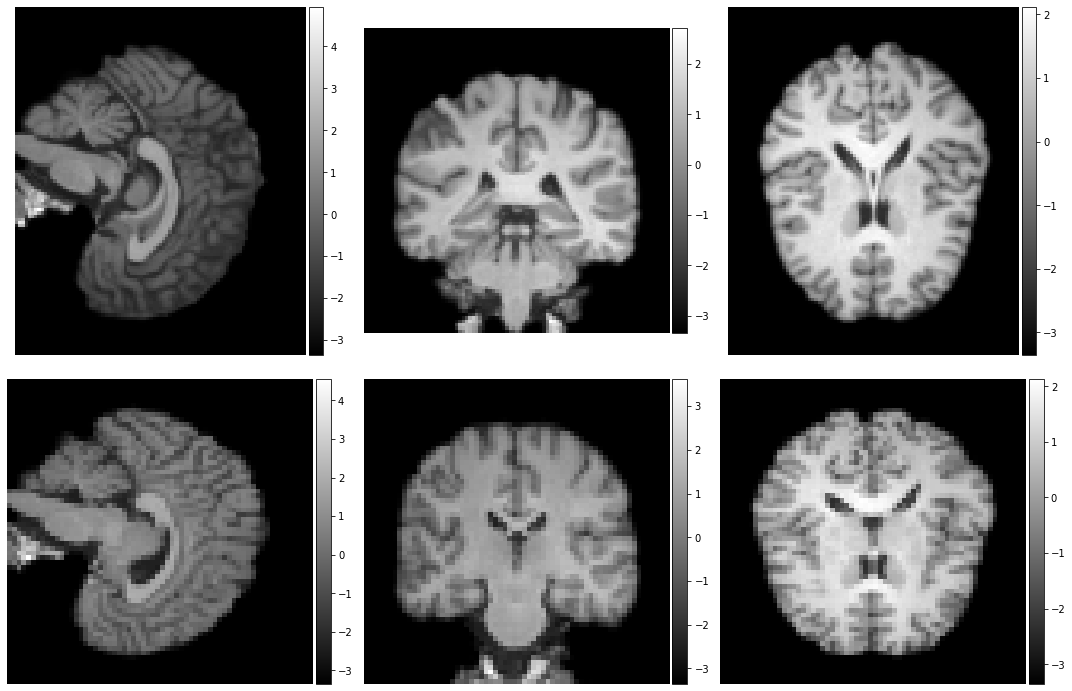

In [ ]:
mid_slices_fixed = [np.take(mynb_np1, 45, axis=d) for d in range(3)]
mid_slices_fixed[1] = np.rot90(mid_slices_fixed[1], 1)
mid_slices_fixed[2] = np.rot90(mid_slices_fixed[2], -1)

mid_slices_moving = [np.take(mynb_np2, 30, axis=d) for d in range(3)]
mid_slices_moving[1] = np.rot90(mid_slices_moving[1], 1)
mid_slices_moving[2] = np.rot90(mid_slices_moving[2], -1)

ne.plot.slices(mid_slices_fixed + mid_slices_moving , cmaps=['gray'], do_colorbars=True, grid=[2,3]);

In [ ]:
unet_encoder_tnsr = torch.randn(size=(2, 512,1,1,1), dtype=torch.float32)
uet = unet_encoder_tnsr.flatten(start_dim=1, end_dim=-1)
print(uet.dtype)
print(uet.shape)

torch.float32
torch.Size([2, 512])


In [ ]:
from torch_geometric.nn import GraphUNet

In [ ]:
gunet = GraphUNet(in_channels=2, hidden_channels=8,out_channels=3,depth=3)

In [ ]:
edge_list = []
traversal_list = []
current_vertex_num = 0
x_max, y_max, z_max = (64, 64, 64)
for z in range(z_max):
  for y in range(y_max):
    for x in range(x_max):
      traversal_list.append([x, y, z])
      if ((x+1) < x_max):
        edge_list.append([current_vertex_num, current_vertex_num + 1])
        #edge_list.append([x+1, y, z])


      if ((x-1) >= 0):
        edge_list.append([current_vertex_num, current_vertex_num - 1])
        #edge_list.append([x-1, y, z])
        

      if ((y+1) < y_max):
        edge_list.append([current_vertex_num, current_vertex_num + y_max -1])
        #edge_list.append([x, y+1, z])
       
      
      if ((y-1) >=0):
        edge_list.append([current_vertex_num, current_vertex_num - y_max + 1])
        #edge_list.append([x, y-1, z])

      if ((z+1) < z_max):
        edge_list.append([current_vertex_num, current_vertex_num + (y_max * z_max) - 1])
        #edge_list.append([x, y, z+1])
       
      
      if ((z-1) >=0):
        edge_list.append([current_vertex_num, current_vertex_num - (y_max * z_max) + 1])
        #edge_list.append([x, y, z-1])
        
      current_vertex_num = current_vertex_num + 1

In [ ]:
traversal_list[0:3]

[[0, 0, 0], [1, 0, 0], [2, 0, 0]]

In [ ]:
edge_list[0:8] + edge_list [ 65556: 65570] + edge_list[-8:] 

[[0, 1],
 [0, 63],
 [0, 4095],
 [1, 2],
 [1, 0],
 [1, 64],
 [1, 4096],
 [2, 3],
 [11723, 11722],
 [11723, 11786],
 [11723, 11660],
 [11723, 15818],
 [11723, 7628],
 [11724, 11725],
 [11724, 11723],
 [11724, 11787],
 [11724, 11661],
 [11724, 15819],
 [11724, 7629],
 [11725, 11726],
 [11725, 11724],
 [11725, 11788],
 [262141, 258046],
 [262142, 262143],
 [262142, 262141],
 [262142, 262079],
 [262142, 258047],
 [262143, 262142],
 [262143, 262080],
 [262143, 258048]]

In [ ]:
input_tensor = torch.randn(size = (262144, 2))
edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()

In [ ]:
class VanillaGraphUnet(torch.nn.Module):
    def __init__(self,  in_channels=2, hidden_channels=8, out_channels = 3, depth=4):
        super(VanillaGraphUnet, self).__init__()
        torch.manual_seed(12345)
        self.in_channels = in_channels
        self.hidden_channels = hidden_channels
        self.out_channels = out_channels
        self.depth = depth
        self.up_convs = torch.nn.ModuleList()
        self.gunet = GraphUNet(in_channels=self.in_channels, hidden_channels=self.hidden_channels, out_channels=self.out_channels, depth=self.depth)
        self.outputlayer = nn.Sequential(nn.BatchNorm3d(self.out_channels), nn.LeakyReLU())

        #self.up_convs.append(self.gunet)
        #self.up_convs.append(self.outputlayer)
        #self.up_convs.append(GCNConv(262144, 2097152, improved=True))
        

    def forward(self, a, b, edge_index1):
        x_in = torch.cat((a, b), 0)
        x_in = torch.reshape(x_in, shape= ( 262144, 2))
        #print("shape of cat: {}".format(x_in.shape))
        x_in = self.gunet(x_in, edge_index1)
        x_in = torch.reshape(x_in, shape=(1,3,64,64,64))
        x_in = self.outputlayer(x_in)
        return x_in


In [ ]:
# Addd deformable part
deformable_model = Deformable_UNet(2,4) # assigning cuda to model

stn_deformable = SpatialTransformer(size=(128, 128, 128), is_affine=False)
for param in stn_deformable.parameters():
  param.requires_grad = False
  param.volatile=True

In [ ]:
lr=1e-4
iteration=2
alpha = 1.0
beta = 1.0
gamma = 1.0
det_mul = 1.0
ortho_mul = 1.0

In [ ]:
similarity_loss = NormalizedCrossCorrelation()
smooth_loss = Smoothnessloss()

In [ ]:
optimizer = torch.optim.Adam(deformable_model.parameters(), lr=lr ) 
model_dir = '/content/drive/My Drive/Image_Registration_Project/cosine_attention_graphunet_model'

if not os.path.isdir(model_dir):
  os.mkdir(model_dir)

n_checkpoint=4000
lossall = np.zeros((5,iteration))
step=0

In [ ]:
batch_size = 1

def one_epoch_run(  epoch=1):
  example_number = 0

  for X,Y in training_generator:

    X = X.float()
    Y = Y.float()

    dvf = deformable_model(X, Y) 

    warped_image = stn_deformable(Y, dvf)

    #smooth_loss = smoothness_regularizer(dvf)
    deformable_loss = similarity_loss(X, warped_image) 

    total_loss = (- beta * deformable_loss )

    optimizer.zero_grad()          
    total_loss.backward()
    optimizer.step()

    del X
    del Y
    del warped_image
    del dvf

    example_number = example_number + 1
    print("Loss for {} is {} ".format(example_number, deformable_loss))

  if (epoch%1 == 0):
    modelname = model_dir + '/' + "graph_registration_" + str(epoch) + '.pth'
    torch.save({"deformable_model": deformable_model.state_dict()}, modelname)
    print("epoch: {}".format(epoch))
    print("Losses: {} ".format(deformable_loss))
    print("Saving model checkpoints")
    print("======= =============== ===========")
    print()

In [ ]:
epochs = 5

for e in range(epochs):
  one_epoch_run( epoch=e )

Loss for 1 is 0.917786180973053 
Loss for 2 is 0.9294354915618896 
Loss for 3 is 0.8729418516159058 
Loss for 4 is 0.9319262504577637 
Loss for 5 is 0.9018781185150146 
Loss for 6 is 0.9354174137115479 
Loss for 7 is 0.9113627672195435 
Loss for 8 is 0.9062130451202393 
Loss for 9 is 0.9277238249778748 
Loss for 10 is 0.8149648904800415 
Loss for 11 is 0.871979296207428 
Loss for 12 is 0.8976514935493469 
Loss for 13 is 0.8219727277755737 
Loss for 14 is 0.8731951713562012 
Loss for 15 is 0.8432854413986206 
Loss for 16 is 0.9176186323165894 
Loss for 17 is 0.807176411151886 
Loss for 18 is 0.8317615985870361 
Loss for 19 is 0.842275857925415 
Loss for 20 is 0.9363793730735779 
Loss for 21 is 0.8619530200958252 
Loss for 22 is 0.950131356716156 
Loss for 23 is 0.9302986860275269 
Loss for 24 is 0.9370693564414978 
Loss for 25 is 0.8676496744155884 
Loss for 26 is 0.921909511089325 
Loss for 27 is 0.9386091232299805 
Loss for 28 is 0.9480991363525391 
Loss for 29 is 0.9452464580535889 


In [ ]:
[1,128,4,4,4]
[1,1,4,4,4]
[1,2,4,4,4]..
[1,128,4,4,4] ==> [1,64,8,8,8]
numofedges(128 * 128) ===> FCN (4,4,4)

# Graph Cosine attention DLIR

In [ ]:
def create_edge_index(maxdims = (64, 64)):
  edge_list = []
  src_node_id_max, tgt_node_id_max = maxdims
  for y in range(tgt_node_id_max):
    for x in range(src_node_id_max):
      edge_list.append([x, y])      
  return edge_list


In [ ]:
edge_index_512 = torch.tensor(create_edge_index(maxdims=(512, 512)), dtype=torch.long).t().contiguous()
edge_index_256 = torch.tensor(create_edge_index(maxdims=(256, 256)), dtype=torch.long).t().contiguous()
edge_index_128 = torch.tensor(create_edge_index(maxdims=(128, 128)), dtype=torch.long).t().contiguous()

edge_index_64 = torch.tensor(create_edge_index(maxdims=(64, 64)), dtype=torch.long).t().contiguous()
edge_index_32 = torch.tensor(create_edge_index(maxdims=(32, 32)), dtype=torch.long).t().contiguous()
edge_index_16 = torch.tensor(create_edge_index(maxdims=(16, 16)), dtype=torch.long).t().contiguous()
edge_index_8 = torch.tensor(create_edge_index(maxdims=(8, 8)), dtype=torch.long).t().contiguous()
edge_index_4 = torch.tensor(create_edge_index(maxdims=(4, 4)), dtype=torch.long).t().contiguous()
edge_index_3 = torch.tensor(create_edge_index(maxdims=(3, 3)), dtype=torch.long).t().contiguous()
edge_index_2 = torch.tensor(create_edge_index(maxdims=(2, 2)), dtype=torch.long).t().contiguous()
print(edge_index_8)
print(edge_index_8.shape)

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7,
         0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7,
         0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
         3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
         6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7]])
torch.Size([2, 64])


In [ ]:
class GCNConv(MessagePassing):
    def __init__(self, in_channels, out_channels, edge_index):
        super(GCNConv, self).__init__(aggr='mean', node_dim=-4)  # "Add" aggregation (Step 5).
        
        self.edge_index = edge_index
        self.conv =  nn.Sequential(nn.ConvTranspose3d(in_channels, out_channels, kernel_size=2, stride=2, padding=0, output_padding=0, bias=True), 
                                   nn.BatchNorm3d(out_channels),
                                   nn.LeakyReLU())
        self.sftmax = torch.nn.Softmax(dim=1)

    def forward(self, x):
        
        # Step 1: Transform node feature matrix.
        x = self.conv(x)
        #print("x shape: {}".format(x.shape))


        # Step 2: Cosine Attention edge weights
        feature_vector = torch.flatten(x, start_dim=2, end_dim=-1)
        feature_vector = feature_vector[0, :, :]

        unit_vector = torch.nn.functional.normalize(feature_vector)
        unit_vectorT = torch.transpose(unit_vector, 1, 0)
        dotproduct_matrix = torch.matmul(unit_vector, unit_vectorT)

        attention_matrix = self.sftmax(dotproduct_matrix)
        #print(attention_matrix)

        norm = torch.flatten(attention_matrix , start_dim=0, end_dim =-1)


        # Step 3: Start propagating messages.
        return self.propagate(self.edge_index, x=x, norm=norm)

    def message(self, x_j, norm):
        norm = norm.view(-1, 1, 1, 1)
        #print("x_j , norm shape: {}, {}".format(x_j.shape, norm.shape))
        return norm * x_j





In [ ]:
#mygcnconv = GCNConv(8, 16)
mygcnconv = GCNConv(8, 4, edge_index=torch.randint(0, 4, (2, 16), dtype=torch.long))

#mygcnconvop = mygcnconv(torch.randn(size=(8, 8)), torch.randint(0, 7, (2, 128), dtype=torch.long))
mygcnconvop = mygcnconv(torch.randn(size=(1, 8, 2,2,2)))

In [ ]:
mygcnconv_512_256 = GCNConv(512, 256, edge_index_256)
mygcnconv_256_128 = GCNConv(256, 128, edge_index_128)
mygcnconv_128_64 = GCNConv(128, 64, edge_index_64)
mygcnconv_64_32 = GCNConv(64, 32, edge_index_32)
mygcnconv_32_16 = GCNConv(32, 16, edge_index_16)
mygcnconv_16_8 = GCNConv(16, 8, edge_index_8)
mygcnconv_8_3 = GCNConv(8, 3, edge_index_3)

In [ ]:
mygcnconvop_512_256 = mygcnconv_512_256(torch.randn(size=(1, 512, 1,1,1)))
print(mygcnconvop_512_256.shape)
mygcnconvop_256_128 = mygcnconv_256_128(mygcnconvop_512_256)
print(mygcnconvop_256_128.shape)
mygcnconvop_128_64 = mygcnconv_128_64(mygcnconvop_256_128)

mygcnconvop_64_32 = mygcnconv_64_32(mygcnconvop_128_64)

mygcnconvop_32_16 = mygcnconv_32_16(mygcnconvop_64_32)

mygcnconvop_16_8 = mygcnconv_16_8(mygcnconvop_32_16)
print(mygcnconvop_16_8.shape)
mygcnconvop_8_3 = mygcnconv_8_3(mygcnconvop_16_8)
print(mygcnconvop_8_3.shape)


torch.Size([1, 256, 2, 2, 2])
torch.Size([1, 128, 4, 4, 4])
torch.Size([1, 8, 64, 64, 64])
torch.Size([1, 3, 128, 128, 128])



tensor([[0.3746, 0.2303, 0.2224, 0.1728],
        [0.2322, 0.3777, 0.1785, 0.2115],
        [0.2238, 0.1782, 0.3770, 0.2210],
        [0.1769, 0.2148, 0.2248, 0.3835]], grad_fn=<SoftmaxBackward>)


torch.Size([4, 64])


x shape: torch.Size([1, 4, 4, 4, 4])


norm shape: torch.Size([128])


size, dim, data_shape: [None, None], 0, torch.Size([1, 4, 4, 4, 4])


args: {'x_j', 'edge_attr'}


src, node_dim, index_shape, index : torch.Size([1, 4, 4, 4, 4]), -4, torch.Size([128]), tensor([2, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 3, 1, 1, 2, 1, 1, 2, 3, 2, 3, 1, 0,
        1, 0, 0, 0, 2, 1, 0, 2, 2, 3, 2, 1, 3, 3, 0, 3, 3, 3, 1, 2, 3, 2, 3, 3,
        0, 1, 3, 1, 3, 3, 0, 2, 0, 3, 0, 1, 1, 2, 3, 3, 2, 1, 2, 2, 3, 0, 1, 3,
        3, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0, 2, 1, 1, 2, 3, 3, 2, 1, 1, 0, 3, 3, 0,
        1, 2, 1, 0, 3, 2, 0, 1, 1, 1, 3, 0, 3, 0, 1, 1, 3, 0, 0, 0, 1, 2, 0, 0,
        3, 2, 2, 0, 2, 0, 3, 0])


torch.Size([1, 128, 4, 4, 4])


edge attribute shape: tensor([-7.8711e-01, -1.2900e+00,  1.4932e+00,  8.2937e-02, -1.4039e+00,
         6.5770e-01,  5.8013e-01,  5.5208e-01, -6.5385e-01, -2.2741e+00,
         6.2621e-01, -2.0180e-01, -1.4273e-01,  5.6291e-01,  3.1767e-01,
        -4.6310e-02, -1.1246e+00, -1.9603e-01,  1.1959e+00,  4.4549e-01,
        -4.4351e-01,  3.9657e-02,  1.0220e+00,  2.3651e-01,  1.0733e-01,
         1.3245e+00, -5.7900e-02,  6.1265e-01,  6.3644e-02,  3.9805e-01,
         1.3555e+00,  9.6004e-01,  4.6158e-01,  1.1615e+00,  7.2171e-01,
         1.0105e-01,  2.2707e-01, -4.7471e-01, -8.5925e-01,  1.8559e+00,
         7.2430e-01,  6.2606e-01,  3.2478e-01,  1.1101e+00, -1.7199e+00,
        -3.4527e-01, -6.4439e-01, -1.0802e-03,  5.7348e-01,  8.7437e-02,
         9.7111e-01,  1.5659e+00, -1.1890e+00, -5.6646e-01,  2.6857e-01,
        -1.0807e+00, -1.4372e+00,  7.5870e-01,  5.6758e-03, -4.2835e-01,
         1.0435e-01, -1.4289e-01, -1.7453e+00, -7.5537e-01, -9.5952e-01,
        -1.1805e+00,  8.4110e-01,  6.8548e-01,  3.8296e-01,  5.4914e-01,
         6.2154e-01, -2.3453e-01,  4.3232e-02, -3.0521e-01, -1.1698e+00,
        -1.4296e-01,  4.5124e-01, -2.4110e-01,  1.8466e+00,  8.1174e-01,
        -2.4952e-01, -2.4159e-01, -4.1222e-01,  1.0370e+00,  2.9471e+00,
        -6.6291e-01,  1.7909e-01,  1.6588e+00,  3.8919e-01, -1.5548e+00,
         1.7186e+00, -4.6976e-01, -9.1489e-01, -5.7007e-01, -7.9806e-01,
         2.6138e-01, -4.7377e-02, -2.5512e-01, -2.4713e+00, -2.2229e-01,
        -1.0171e+00,  4.7181e-01,  6.4157e-02,  9.3759e-01,  1.2716e+00,
         6.7398e-01, -1.4068e+00, -1.7234e-02,  2.1532e-01,  1.1023e+00,
         1.4604e-01, -1.5921e+00, -2.9252e-01,  2.4897e-01,  1.2275e+00,
        -9.2455e-01, -8.3102e-01,  9.2719e-01,  2.2612e+00,  3.2453e-01,
        -8.6194e-01, -1.9834e-01,  6.0475e-01, -5.2845e-01, -2.6147e-01,
         1.8156e+00, -4.7906e-01, -4.5446e-01])
x_j , norm shape: torch.Size([1, 128, 4, 4, 4]), torch.Size([128, 1, 1, 1])
torch.Size([1, 4, 4, 4, 4])

In [ ]:
class Deformable_UNet(nn.Module):
  def __init__(self,in_channel , start_channel, n_classes=3 , d_model=512, N=6, heads=8):
        self.in_channel = in_channel
        self.n_classes = n_classes
        self.start_channel = start_channel
        self.device = "cuda"

        class GCNConv(MessagePassing):
          def __init__(self, in_channels, out_channels, edge_index):
              super(GCNConv, self).__init__(aggr='mean', node_dim=-4)  # "Add" aggregation (Step 5).
              
              self.edge_index = edge_index
              self.conv =  nn.Sequential(nn.ConvTranspose3d(in_channels, out_channels, kernel_size=2, stride=2, padding=0, output_padding=0, bias=True), 
                                        nn.BatchNorm3d(out_channels),
                                        nn.LeakyReLU())
              self.sftmax = torch.nn.Softmax(dim=1)
              

          def forward(self, x):

              # Step 1: Transform node feature matrix.
              # print(x.is_cuda)
              x = self.conv(x)
              # print("x shape: {}".format(x.shape))


              # Step 2: Cosine Attention edge weights
              feature_vector = torch.flatten(x, start_dim=2, end_dim=-1)
              feature_vector = feature_vector[0, :, :]

              unit_vector = torch.nn.functional.normalize(feature_vector)
              unit_vectorT = torch.transpose(unit_vector, 1, 0)
              dotproduct_matrix = torch.matmul(unit_vector, unit_vectorT)

              attention_matrix = self.sftmax(dotproduct_matrix)
              # print(attention_matrix)

              norm = torch.flatten(attention_matrix , start_dim=0, end_dim =-1)
              # print(norm.is_cuda)


              # Step 3: Start propagating messages.
              return self.propagate(self.edge_index, x=x, norm=norm)

          def message(self, x_j, norm):
              norm = norm.view(-1, 1, 1, 1)
              #print(x_j.is_cuda)
              #print("x_j , norm shape: {}, {}".format(x_j.shape, norm.shape))
              # print(norm)
              return norm * x_j


        super(Deformable_UNet, self).__init__()

        self.transformerencoder = Encoder(d_model=d_model, N = N, heads = heads)
        # Flexible encoders
        self.eninput = self.encoder(self.in_channel, self.start_channel, bias=False)

        self.ec1 = self.encoder(self.start_channel, self.start_channel, bias=False)
        self.ec2 = self.encoder(self.start_channel, self.start_channel*2, stride=2, bias=False)

        self.ec3 = self.encoder(self.start_channel*2, self.start_channel*2, bias=False)
        self.ec4 = self.encoder(self.start_channel*2, self.start_channel*4, stride=2, bias=False)

        self.ec5 = self.encoder(self.start_channel*4, self.start_channel*4, bias=False)
        self.ec6 = self.encoder(self.start_channel*4, self.start_channel*8, stride=2, bias=False)

        self.ec7 = self.encoder(self.start_channel*8, self.start_channel*8, bias=False)
        self.ec8 = self.encoder(self.start_channel*8, self.start_channel*16, stride=2, bias=False)

        self.ec9 = self.encoder(self.start_channel*16, self.start_channel*16, bias=False)
        self.ec10 = self.encoder(self.start_channel*16, self.start_channel*32, stride=2, bias=False)

        self.ec11 = self.encoder(self.start_channel*32, self.start_channel*32, bias=False)
        self.ec12 = self.encoder(self.start_channel*32, self.start_channel*64, stride=2, bias=False)

        self.ec13 = self.encoder(self.start_channel*64, self.start_channel*64, bias=False)
        #self.ec14 = self.encoder(self.start_channel*64, self.start_channel*128, stride=2, bias=False)
        self.ec14 = nn.Sequential(
                      nn.Conv3d(self.start_channel*64, self.start_channel*128,  kernel_size=3, stride=2, padding=1),
                      nn.LeakyReLU())

        self.edge_index_512 = torch.tensor(create_edge_index(maxdims=(512, 512)), dtype=torch.long).t().contiguous().to(self.device)
        self.edge_index_256 = torch.tensor(create_edge_index(maxdims=(256, 256)), dtype=torch.long).t().contiguous().to(self.device)
        self.edge_index_128 = torch.tensor(create_edge_index(maxdims=(128, 128)), dtype=torch.long).t().contiguous().to(self.device)

        self.edge_index_64 = torch.tensor(create_edge_index(maxdims=(64, 64)), dtype=torch.long).t().contiguous().to(self.device)
        self.edge_index_32 = torch.tensor(create_edge_index(maxdims=(32, 32)), dtype=torch.long).t().contiguous().to(self.device)
        self.edge_index_16 = torch.tensor(create_edge_index(maxdims=(16, 16)), dtype=torch.long).t().contiguous().to(self.device)
        self.edge_index_8 = torch.tensor(create_edge_index(maxdims=(8, 8)), dtype=torch.long).t().contiguous().to(self.device)
        self.edge_index_4 = torch.tensor(create_edge_index(maxdims=(4, 4)), dtype=torch.long).t().contiguous().to(self.device)
        self.edge_index_3 = torch.tensor(create_edge_index(maxdims=(3, 3)), dtype=torch.long).t().contiguous().to(self.device)
        self.edge_index_2 = torch.tensor(create_edge_index(maxdims=(2, 2)), dtype=torch.long).t().contiguous().to(self.device)

        self.mygcnconv_512_256 = GCNConv(512, 256, self.edge_index_256)
        self.mygcnconv_256_128 = GCNConv(256, 128, self.edge_index_128)
        self.mygcnconv_128_64 = GCNConv(128, 64, self.edge_index_64)
        self.mygcnconv_64_32 = GCNConv(64, 32, self.edge_index_32)
        self.mygcnconv_32_16 = GCNConv(32, 16, self.edge_index_16)
        self.mygcnconv_16_8 = GCNConv(16, 8, self.edge_index_8)
        self.mygcnconv_8_3 = GCNConv(8, 3, self.edge_index_3)

  def create_edge_index(self, maxdims = (64, 64)):
    edge_list = []
    src_node_id_max, tgt_node_id_max = maxdims
    for y in range(tgt_node_id_max):
      for x in range(src_node_id_max):
        edge_list.append([x, y])      
    return edge_list

  def encoder(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1,
                bias=True):
    layer = nn.Sequential(
                nn.Conv3d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, bias=bias),
                nn.BatchNorm3d(out_channels),
                nn.LeakyReLU())
    return layer

  def decoder(self, in_channels, out_channels, kernel_size=2, stride=2, padding=0,
                output_padding=0, bias=True):
    layer = nn.Sequential(
                nn.ConvTranspose3d(in_channels, out_channels, kernel_size, stride=stride,
                               padding=padding, output_padding=output_padding, bias=bias),
                                nn.LeakyReLU())
    return layer
       
  def output(self, in_channels, out_channels, kernel_size=3, 
                bias=False, batchnorm=False):
    layer = nn.Sequential(
                nn.Conv3d(in_channels, out_channels, kernel_size, bias=bias),
               )
    return layer

  def forward(self, x,y):
        # print("x,y", x.shape, "  ", y.shape)
        x_in=torch.cat((x, y), 1)  
        e0 = self.eninput(x_in)

        # print("e0", e0.shape)

        e0 = self.ec1(e0)
        es1 = self.ec2(e0)   #strided
        # print("e0", e0.shape)
        # print("es1", es1.shape)

        e1 = self.ec3(es1)   
        es2 = self.ec4(e1)   #strided
        # print("e1", e1.shape)
        # print("es2", es2.shape)

        e2 = self.ec5(es2)
        es3 = self.ec6(e2)   #strided
        # print("e2", e2.shape)
        # print("es3", es3.shape)

        e3 = self.ec7(es3)
        es4 = self.ec8(e3)   #strided
        #print("encoder es4: {}".format(es4.shape))
        e4 = self.ec9(es4)
        es5 = self.ec10(e4)   #strided

        e5 = self.ec11(es5)
        es6 = self.ec12(e5)   #strided

        e6 = self.ec13(es6)
        #print("encoder e6: {}".format(e6.shape))
        es7 = self.ec14(e6)   #strided
        #print("encoder final shape: {}".format(es7.shape))

        #Transformer encoder
        uet = es7.flatten(start_dim=1, end_dim=-1)
        transformerencoder_out = self.transformerencoder(uet)

        unflattened_tnsr = transformerencoder_out.unflatten(dim=1, sizes=(self.start_channel*128, 1, 1, 1))
        
        #Decoder starts
        mygcnconvop_512_256 = self.mygcnconv_512_256(unflattened_tnsr)
        mygcnconvop_512_256 = torch.add(mygcnconvop_512_256, e6)     
        
        mygcnconvop_256_128 = self.mygcnconv_256_128(mygcnconvop_512_256)
        mygcnconvop_256_128 = torch.add(mygcnconvop_256_128, e5)
      
        mygcnconvop_128_64 = self.mygcnconv_128_64(mygcnconvop_256_128)
        mygcnconvop_128_64 = torch.add(mygcnconvop_128_64, e4)

        mygcnconvop_64_32 = self.mygcnconv_64_32(mygcnconvop_128_64)
        mygcnconvop_64_32 = torch.add(mygcnconvop_64_32, e3)

        mygcnconvop_32_16 = self.mygcnconv_32_16(mygcnconvop_64_32)
        mygcnconvop_32_16 = torch.add(mygcnconvop_32_16, e2)

        mygcnconvop_16_8 = self.mygcnconv_16_8(mygcnconvop_32_16)
        mygcnconvop_16_8 = torch.add(mygcnconvop_16_8, e1)
        
        mygcnconvop_8_3 = self.mygcnconv_8_3(mygcnconvop_16_8)
        
        return mygcnconvop_8_3

In [ ]:
model = Deformable_UNet(2,4).to("cuda")

In [ ]:
modelop = model(torch.randn(size=(1,1,128, 128, 128), dtype=torch.float32).to("cuda"), torch.randn(size=(1,1,128, 128, 128), dtype=torch.float32).to("cuda"))

In [ ]:
del modelop

In [ ]:
class GCNConv(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super(GCNConv, self).__init__(aggr='mean', node_dim=-4)  # "Add" aggregation (Step 5).
        #self.lin = torch.nn.Linear(in_channels, out_channels)

        self.conv =  nn.Sequential(nn.ConvTranspose3d(in_channels, out_channels, kernel_size=2, stride=2, padding=0, output_padding=0, bias=True),
                                   nn.BatchNorm3d(out_channels),
                                   nn.LeakyReLU())
        

    def forward(self, x, edge_index):

        # Step 1: Transform node feature matrix.
        x = self.conv(x)
        print("x shape: {}".format(x.shape))


        # Step 2: Cosine Attention edge weights
        feature_vector = torch.flatten(x, start_dim=2, end_dim=-1)
        feature_vector = feature_vector[0, :, :]

        unit_vector = torch.nn.functional.normalize(feature_vector)
        unit_vectorT = torch.transpose(unit_vector, 1, 0)
        dotproduct_matrix = torch.matmul(unit_vector, unit_vectorT)

        attention_matrix = self.sftmax(dotproduct_matrix)
        print(attention_matrix)

        norm = torch.nn.Flatten(attention_matrix , start_dim=0, end_dim -1)


        # Step 3: Start propagating messages.
        return self.propagate(edge_index, x=x, norm=norm)

    def message(self, x_j, norm):
        return norm.view(-1, 1) * x_j

mygcnconv = GCNConv(256, 256)

SyntaxError: ignored

In [ ]:
mygcnconvop = mygcnconv(torch.randn(size=(1, 256, 2,2,2)), torch.randint(0, 7, (2, 512), dtype=torch.long))

x shape: torch.Size([1, 256, 4, 4, 4])


IndexError: ignored

In [ ]:
 row, col = torch.randint(0, 7, (2, 512), dtype=torch.long)

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self,  in_feats, hidden_feats, out_feats):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.up_convs = torch.nn.ModuleList()
        depth = out_feats // in_feats
        self.up_convs.append(GCNConv(in_feats, 64, improved=True))
        
        self.up_convs.append(GCNConv(64, 512, improved=True))
        self.up_convs.append(GCNConv(512, 4096, improved=True))
        self.up_convs.append(GCNConv(4096, 32768, improved=True))
        self.up_convs.append(GCNConv(32768, 262144, improved=True))
        #self.up_convs.append(GCNConv(262144, 2097152, improved=True))
        

    def forward(self, x, edge_index):

        #x = self.conv1(x, edge_index)
        #x = x.relu()
        #x = F.dropout(x, p=0.5, training=self.training)
        #x = self.conv2(x, edge_index)
        x = up_convs(x, edge_index)
        return x


In [ ]:
edge_index = torch.randint(0, 7, (2, 512), dtype=torch.long)

x = torch.randn(size=(128,8), dtype=torch.float32)


In [ ]:
data = Data(x=x, edge_index=edge_index)

In [ ]:
data.x[0]

tensor([ 1.1410,  0.1119, -0.2084,  1.8369,  0.3291,  1.6892,  0.1928, -0.8825])

In [ ]:

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print("Node feature dimensons: {}".format(data.num_features))
# print(f'Number of training nodes: {data.train_mask.sum()}')
# print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(edge_index=[2, 512], x=[128, 8])
Number of nodes: 128
Number of edges: 512
Average node degree: 4.00
Node feature dimensons: 8
Contains isolated nodes: True
Contains self-loops: True
Is undirected: True


In [ ]:
model = GCN(in_feats=8, hidden_feats=16, out_feats=2097152)
print(model)

In [ ]:
out = model(data.x, data.edge_index)

In [ ]:
print(out.shape)

torch.Size([128, 32])


In [ ]:
mytn = torch.randn(128)
msg = mytn.view(-1,1) * torch.randn(size=(128, 16))
msg.shape

torch.Size([128, 16])

In [ ]:
x_j = torch.randn(size=( 128, 4, 4, 4))
edge_attr = torch.randn(128)
norm = edge_attr.view(-1, 1, 1, 1)
norm.shape

torch.Size([128, 1, 1, 1])

In [ ]:
new_x_j = norm * x_j

# Complete Deformable model

In [ ]:
class Deformable_UNet(nn.Module):
  def __init__(self,in_channel , start_channel, n_classes=3 , d_model=512, N=6, heads=8):
        self.in_channel = in_channel
        self.n_classes = n_classes
        self.start_channel = start_channel
        super(Deformable_UNet, self).__init__()

        self.transformerencoder = Encoder(d_model=d_model, N = N, heads = heads)

        self.eninput = self.encoder(self.in_channel, self.start_channel, bias=False)

        self.ec1 = self.encoder(self.start_channel, self.start_channel, bias=False)
        self.ec2 = self.encoder(self.start_channel, self.start_channel*2, stride=2, bias=False)

        self.ec3 = self.encoder(self.start_channel*2, self.start_channel*2, bias=False)
        self.ec4 = self.encoder(self.start_channel*2, self.start_channel*4, stride=2, bias=False)

        self.ec5 = self.encoder(self.start_channel*4, self.start_channel*4, bias=False)
        self.ec6 = self.encoder(self.start_channel*4, self.start_channel*8, stride=2, bias=False)

        self.ec7 = self.encoder(self.start_channel*8, self.start_channel*8, bias=False)
        self.ec8 = self.encoder(self.start_channel*8, self.start_channel*16, stride=2, bias=False)

        self.ec9 = self.encoder(self.start_channel*16, self.start_channel*16, bias=False)
        self.ec10 = self.encoder(self.start_channel*16, self.start_channel*32, stride=2, bias=False)

        self.ec11 = self.encoder(self.start_channel*32, self.start_channel*32, bias=False)
        self.ec12 = self.encoder(self.start_channel*32, self.start_channel*64, stride=2, bias=False)

        self.ec13 = self.encoder(self.start_channel*64, self.start_channel*64, bias=False)
        self.ec14 = self.encoder(self.start_channel*64, self.start_channel*128, stride=2, bias=False)

        self.dc1 = self.encoder(self.start_channel*128, self.start_channel*128, kernel_size=3, stride=1, bias=False) 
        self.dc2 = self.encoder(self.start_channel*64, self.start_channel*64, kernel_size=3, stride=1, bias=False) 
        self.dc3 = self.encoder(self.start_channel*32, self.start_channel*32, kernel_size=3, stride=1, bias=False)          
        self.dc4 = self.encoder(self.start_channel*16, self.start_channel*16, kernel_size=3, stride=1, bias=False)
        self.dc5 = self.encoder(self.start_channel*8, self.start_channel*8, kernel_size=3, stride=1, bias=False) 
        self.dc6 = self.encoder(self.start_channel*4, self.start_channel*4, kernel_size=3, stride=1, bias=False)          
        self.dc7 = self.encoder(self.start_channel*2, self.start_channel*2, kernel_size=3, stride=1, bias=False)
        self.dc8 = self.output(self.start_channel, self.n_classes, kernel_size=1,bias=False)

        self.up1 = self.decoder(self.start_channel*128, self.start_channel*64)
        self.up2 = self.decoder(self.start_channel*64, self.start_channel*32)
        self.up3 = self.decoder(self.start_channel*32, self.start_channel*16)
        self.up4 = self.decoder(self.start_channel*16, self.start_channel*8)
        self.up5 = self.decoder(self.start_channel*8, self.start_channel*4)
        self.up6 = self.decoder(self.start_channel*4, self.start_channel*2)
        self.up7 = self.decoder(self.start_channel*2, self.start_channel)

  def encoder(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1,
                bias=True):
    layer = nn.Sequential(
                nn.Conv3d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, bias=bias),
                nn.BatchNorm3d(out_channels),
                nn.LeakyReLU())
    return layer

  def decoder(self, in_channels, out_channels, kernel_size=2, stride=2, padding=0,
                output_padding=0, bias=True):
    layer = nn.Sequential(
                nn.ConvTranspose3d(in_channels, out_channels, kernel_size, stride=stride,
                               padding=padding, output_padding=output_padding, bias=bias),
                                nn.LeakyReLU())
    return layer
       
  def output(self, in_channels, out_channels, kernel_size=3, 
                bias=False, batchnorm=False):
    layer = nn.Sequential(
                nn.Conv3d(in_channels, out_channels, kernel_size, bias=bias),
               )
    return layer

  def forward(self, x,y):
        # print("x,y", x.shape, "  ", y.shape)
        x_in=torch.cat((x, y), 1)  
        e0 = self.eninput(x_in)

        # print("e0", e0.shape)

        e0 = self.ec1(e0)
        es1 = self.ec2(e0)   #strided
        # print("e0", e0.shape)
        # print("es1", es1.shape)

        e1 = self.ec3(es1)   
        es2 = self.ec4(e1)   #strided
        # print("e1", e1.shape)
        # print("es2", es2.shape)

        e2 = self.ec5(es2)
        es3 = self.ec6(e2)   #strided
        # print("e2", e2.shape)
        # print("es3", es3.shape)

        e3 = self.ec7(es3)
        es4 = self.ec8(e3)   #strided

        e4 = self.ec9(es4)
        es5 = self.ec10(e4)   #strided

        e5 = self.ec11(es5)
        es6 = self.ec12(e5)   #strided

        e6 = self.ec13(es6)
        # print("encoder e6: {}".format(e6.shape))
        es7 = self.ec14(e6)   #strided
        # print("encoder final shape: {}".format(es7.shape))

        #Transformer encoder
        uet = es7.flatten(start_dim=1, end_dim=-1)
        transformerencoder_out = self.transformerencoder(uet)

        unflattened_tnsr = transformerencoder_out.unflatten(dim=1, sizes=(self.start_channel*128, 1, 1, 1))
        
        #Decoder starts
        d0 = self.dc1(unflattened_tnsr)
        # print("d0", d0.shape)
        # print("decoder first shape and upsampled shape: {}, {}".format(d0.shape, self.up1(d0).shape))
        d0 = torch.add(self.up1(d0), e6)
        # print("d0", d0.shape)

        d1 = self.dc2(d0)
        d1 = torch.add(self.up2(d1), e5)
        # print("d1", d1.shape)

        d2 = self.dc3(d1)
        d2 = torch.add(self.up3(d2), e4)
        # print("d2", d2.shape)

        d3 = self.dc4(d2)
        d3 = torch.add(self.up4(d3), e3)
        # print("d2", d2.shape)

        d4 = self.dc5(d3)
        d4 = torch.add(self.up5(d4), e2)
        # print("d2", d2.shape)

        d5 = self.dc6(d4)
        d5 = torch.add(self.up6(d5), e1)
        # print("d2", d2.shape)

        d6 = self.dc7(d5)
        d6 = torch.add(self.up7(d6), e0)
        # print("d2", d2.shape)

        output = self.dc8(d6)
        return output

In [ ]:
model = Deformable_UNet(2,4).to("cpu") # assigning cuda to model

In [ ]:
count = 0
for X,Y in training_generator:
  X = X.to("cpu").float()
  Y = Y.to("cpu").float()
  # print(X.shape)
  # print(Y.shape)
  out = model(X, Y)
  # print(out.shape)
  # print("========== ============== =============")
  # print()
  count = count + 1
  del X
  del Y
  del out
  torch.cuda.empty_cache()
  if (count > 2):
    break;

encoder e6: torch.Size([2, 256, 2, 2, 2])
encoder final shape: torch.Size([2, 512, 1, 1, 1])
decoder first shape and upsampled shape: torch.Size([2, 512, 1, 1, 1]), torch.Size([2, 256, 2, 2, 2])
encoder e6: torch.Size([2, 256, 2, 2, 2])
encoder final shape: torch.Size([2, 512, 1, 1, 1])
decoder first shape and upsampled shape: torch.Size([2, 512, 1, 1, 1]), torch.Size([2, 256, 2, 2, 2])
encoder e6: torch.Size([2, 256, 2, 2, 2])
encoder final shape: torch.Size([2, 512, 1, 1, 1])
decoder first shape and upsampled shape: torch.Size([2, 512, 1, 1, 1]), torch.Size([2, 256, 2, 2, 2])


# Spatial Transformer

In [ ]:
class SpatialTransformer(nn.Module):
    """
    N-D Spatial Transformer
    """

    def __init__(self, size, is_affine=False, theta = None, mode='bilinear', affine_image_size =  (2, 1, 128, 128, 128)):
        super().__init__()

        self.mode = mode
        self.isaffine = is_affine
        self.theta = theta
        self.affine_image_size =  affine_image_size
        # create sampling grid
        # registering the grid as a buffer cleanly moves it to the GPU, but it also
        # adds it to the state dict. this is annoying since everything in the state dict
        # is included when saving weights to disk, so the model files are way bigger
        # than they need to be. so far, there does not appear to be an elegant solution.
        # see: https://discuss.pytorch.org/t/how-to-register-buffer-without-polluting-state-dict

        if (self.isaffine):
          grid = F.affine_grid(self.theta, self.affine_image_size, align_corners=False)
          #grid = grid.permute(0, 4, 1, 2, 3)
          self.register_buffer('grid', grid)
        else:
          vectors = [torch.arange(0, s) for s in size]
          grids = torch.meshgrid(vectors)
          grid = torch.stack(grids)
          grid = torch.unsqueeze(grid, 0)
          grid = grid.type(torch.FloatTensor)
          self.register_buffer('grid', grid)

    def forward(self, src, flow=None):      
      if (self.isaffine):
        grid = F.affine_grid(self.theta, self.affine_image_size)        
        warped_image = F.grid_sample(src, grid)
        #warped_image = warped_image.permute(0, 4, 1, 2, 3)
        return warped_image
      else:
        # new locations
        new_locs = self.grid + flow
        shape = flow.shape[2:]

        # need to normalize grid values to [-1, 1] for resampler
        for i in range(len(shape)):
            new_locs[:, i, ...] = 2 * (new_locs[:, i, ...] / (shape[i] - 1) - 0.5)

        # move channels dim to last position
        # also not sure why, but the channels need to be reversed
        if len(shape) == 2:
            new_locs = new_locs.permute(0, 2, 3, 1)
            new_locs = new_locs[..., [1, 0]]
        elif len(shape) == 3:
            new_locs = new_locs.permute(0, 2, 3, 4, 1)
            new_locs = new_locs[..., [2, 1, 0]]

        return F.grid_sample(src, new_locs, align_corners=True, mode=self.mode)


# Losses, Regularizers and Optimizers

In [ ]:
def normalized_cross_correlation(x, y, return_map, reduction='mean', eps=1e-8):
    """ N-dimensional normalized cross correlation (NCC)
    Args:
        x (~torch.Tensor): Input tensor.
        y (~torch.Tensor): Input tensor.
        return_map (bool): If True, also return the correlation map.
        reduction (str, optional): Specifies the reduction to apply to the output:
            ``'mean'`` | ``'sum'``. Defaults to ``'sum'``.
        eps (float, optional): Epsilon value for numerical stability. Defaults to 1e-8.
    Returns:
        ~torch.Tensor: Output scalar
        ~torch.Tensor: Output tensor
    """

    shape = x.shape
    b = shape[0]

    # reshape
    x = x.view(b, -1)
    y = y.view(b, -1)

    # mean
    x_mean = torch.mean(x, dim=1, keepdim=True)
    y_mean = torch.mean(y, dim=1, keepdim=True)

    # deviation
    x = x - x_mean
    y = y - y_mean

    dev_xy = torch.mul(x,y)
    dev_xx = torch.mul(x,x)
    dev_yy = torch.mul(y,y)

    dev_xx_sum = torch.sum(dev_xx, dim=1, keepdim=True)
    dev_yy_sum = torch.sum(dev_yy, dim=1, keepdim=True)

    ncc = torch.div(dev_xy + eps / dev_xy.shape[1],
                    torch.sqrt( torch.mul(dev_xx_sum, dev_yy_sum)) + eps)
    ncc_map = ncc.view(b, *shape[1:])

    # reduce
    if reduction == 'mean':
        ncc = torch.mean(torch.sum(ncc, dim=1))
    elif reduction == 'sum':
        ncc = torch.sum(ncc)
    else:
        raise KeyError('unsupported reduction type: %s' % reduction)

    if not return_map:
        return ncc
    
    if (torch.isclose(torch.tensor([-1.0]).to("cuda"), ncc).any()):
      ncc = ncc + torch.tensor([0.01]).to("cuda")

    elif (torch.isclose(torch.tensor([1.0]).to("cuda"), ncc).any()):
      ncc = ncc - torch.tensor([0.01]).to("cuda")

    return ncc, ncc_map

In [ ]:
class NormalizedCrossCorrelation(nn.Module):
    """ N-dimensional normalized cross correlation (NCC)
    Args:
        eps (float, optional): Epsilon value for numerical stability. Defaults to 1e-8.
        return_map (bool, optional): If True, also return the correlation map. Defaults to False.
        reduction (str, optional): Specifies the reduction to apply to the output:
            ``'mean'`` | ``'sum'``. Defaults to ``'mean'``.
    """
    def __init__(self,
                 eps=1e-8,
                 return_map=False,
                 reduction='mean'):

        super(NormalizedCrossCorrelation, self).__init__()

        self._eps = eps
        self._return_map = return_map
        self._reduction = reduction

    def forward(self, x, y):

        return normalized_cross_correlation(x, y,self._return_map, self._reduction, self._eps)

In [ ]:
def smoothness_regularizer( input_tensor=None):
  if(input_tensor == None):
    dvf_tensor = torch.randn(size=(4, 3, 128, 128, 128)).cuda()
  else:
    dvf_tensor = input_tensor
  
  dvf_x = dvf_tensor[:, 0:1, ...]
  dvf_y = dvf_tensor[:, 1:2, ...]
  dvf_z = dvf_tensor[:, 2:3, ...]

  sobel_z = torch.FloatTensor( [ [ [ [ [1,2,1], [2,4,2], [1,2,1] ], [ [0,0,0], [0,0,0], [0,0,0] ], [ [-1,-2,-1], [-2,-4,-2], [-1,-2,-1] ] ] ] ] ).cuda()
  sobel_y = torch.FloatTensor( [ [ [ [ [1,2,1], [0,0,0], [-1,-2,-1] ], [ [2,4,2], [0,0,0], [-2,-4,-2] ], [ [1,2,1], [0,0,0], [-1,-2,-1] ] ] ] ] ).cuda()
  sobel_x = torch.FloatTensor( [ [ [ [ [1,0,-1], [2,0,-2], [1,0,-1] ], [ [2,0,-2], [4,0,-4], [2,0,-2] ], [ [1,0,-1], [2,0,-2], [1,0,-1] ] ] ] ] ).cuda()

  edges_x = F.conv3d(input=dvf_x, weight=sobel_x , stride=1, padding=1)
  edges_y = F.conv3d(input=dvf_y, weight=sobel_y , stride=1, padding=1)
  edges_z = F.conv3d(input=dvf_z, weight=sobel_z , stride=1, padding=1)

  magnitude_of_edges_along_x = torch.norm(edges_x)
  magnitude_of_edges_along_y = torch.norm(edges_y)
  magnitude_of_edges_along_z = torch.norm(edges_z)
  #print("Magnitudes of gradients along x, y and z are {}, {} and {}".format(magnitude_of_edges_along_x, magnitude_of_edges_along_y, magnitude_of_edges_along_z))

  return magnitude_of_edges_along_x + magnitude_of_edges_along_y + magnitude_of_edges_along_z

In [ ]:
class Smoothnessloss(nn.Module):
    def __init__(self):

        super(Smoothnessloss, self).__init__()
        
    def forward(self, x):
        smth_loss = smoothness_regularizer( x)
        return torch.sqrt(smth_loss)

# Training

In [ ]:
del deformable_model

In [ ]:
# Addd deformable part
deformable_model = Deformable_UNet(2,4).to("cuda") # assigning cuda to model

stn_deformable = SpatialTransformer(size=(128, 128, 128), is_affine=False).to("cuda")
for param in stn_deformable.parameters():
  param.requires_grad = False
  param.volatile=True

In [ ]:
checkpoint = torch.load('/content/drive/My Drive/Image_Registration_Project/graph_image_registration_model1/graph_registration_30.pth')
deformable_model.load_state_dict(checkpoint["deformable_model"])

In [ ]:
lr=1e-4
iteration=2
alpha = 1.0
beta = -2.0
gamma = 0.001
det_mul = 1.0
ortho_mul = 1.0

In [ ]:
similarity_loss = NormalizedCrossCorrelation()
smooth_loss = Smoothnessloss()

In [ ]:
optimizer = torch.optim.Adam(deformable_model.parameters(), lr=lr ) 
model_dir = '/content/drive/My Drive/Image_Registration_Project/graph_image_registration_model1'

if not os.path.isdir(model_dir):
  os.mkdir(model_dir)

n_checkpoint=4000
lossall = np.zeros((5,iteration))
step=0

In [ ]:
batch_size = 2

def one_epoch_run(epoch=1):
  example_number = 0
  deformable_loss_lst = []
  smooth_loss_lst = []
  total_loss_lst = []
  for X,Y in training_generator:

    X = X.cuda().float()
    Y = Y.cuda().float()

    dvf = deformable_model(X, Y) 

    warped_image = stn_deformable(Y, dvf)

    smooth_loss = smoothness_regularizer(dvf)
    deformable_loss = similarity_loss(X, warped_image) 

    total_loss = (beta * deformable_loss ) + ( gamma * smooth_loss )
    

    optimizer.zero_grad()          
    total_loss.backward()
    optimizer.step()

    total_loss_lst.append(total_loss.detach().cpu().numpy().item())
    deformable_loss_lst.append(deformable_loss.detach().cpu().numpy().item())
    smooth_loss_lst.append(smooth_loss.detach().cpu().numpy().item())

    del X
    del Y
    del warped_image
    del dvf

    example_number = example_number + 1

  if (epoch%5 == 0):
    modelname = model_dir + '/' + "graph_registration_" + str(epoch+64) + '.pth'
    torch.save({"deformable_model": deformable_model.state_dict()}, modelname)
    print("epoch: {}".format(epoch+64))
    print("Losses: {} and {}".format(deformable_loss, smooth_loss))
    print("Average loss per epoch: {}, {}, {}".format( sum(deformable_loss_lst)/len(deformable_loss_lst), sum(smooth_loss_lst)/len(smooth_loss_lst), sum(total_loss_lst)/len(total_loss_lst)  ))
    print("======= =============== ===========")
    print("Saving model checkpoints")
    print("======= =============== ===========")
    print()
  elif (epoch%2 == 0):
    print("epoch: {}".format(epoch+64))
    print("Losses: {} and {}".format(deformable_loss, smooth_loss))
    print("Average loss per epoch: {}, {}, {}".format( sum(deformable_loss_lst)/len(deformable_loss_lst), sum(smooth_loss_lst)/len(smooth_loss_lst), sum(total_loss_lst)/len(total_loss_lst)  ))
    print("======= =============== ===========")
    print()

In [ ]:
epochs = 31
for e in range(epochs):
  one_epoch_run(epoch=e)

epoch: 64
Losses: 0.8851507306098938 and 14.571678161621094
Average loss per epoch: 0.8804338350892067, 14.587205982208252, -1.7462804675102235
======= =============== ===========
Saving model checkpoints
======= =============== ===========

epoch: 66
Losses: 0.8786452412605286 and 14.269447326660156
Average loss per epoch: 0.8784358605742455, 14.364108991622924, -1.7425076156854629
======= =============== ===========

epoch: 68
Losses: 0.9047679901123047 and 13.695110321044922
Average loss per epoch: 0.8761871606111526, 13.765791845321655, -1.7386085271835328
======= =============== ===========

epoch: 69
Losses: 0.9020933508872986 and 13.353459358215332
Average loss per epoch: 0.877739480137825, 13.611157107353211, -1.741867807507515
======= =============== ===========
Saving model checkpoints
======= =============== ===========

epoch: 70
Losses: 0.9023534655570984 and 13.2050199508667
Average loss per epoch: 0.8811059683561325, 13.506185626983642, -1.7487057536840438
======= ======

In [ ]:
epochs = 31
for e in range(epochs):
  one_epoch_run(epoch=e)

epoch: 0
Losses: 0.8758964538574219 and 1637.4881591796875
Average loss per epoch: 0.8728085324168205, 1749.9133514404298, 0.004296365380287171
======= =============== ===========
Saving model checkpoints
======= =============== ===========

epoch: 2
Losses: 0.8389896750450134 and 1329.592529296875
Average loss per epoch: 0.8792032971978188, 1369.6872436523438, -0.3887192875146866
======= =============== ===========

epoch: 4
Losses: 0.9128268361091614 and 1103.5379638671875
Average loss per epoch: 0.8781516537070274, 1142.6628997802734, -0.6136403501033783
======= =============== ===========

epoch: 5
Losses: 0.878552258014679 and 1015.4143676757812
Average loss per epoch: 0.8800565853714943, 1057.6831771850586, -0.7024299561977386
======= =============== ===========
Saving model checkpoints
======= =============== ===========

epoch: 6
Losses: 0.8708640933036804 and 950.13671875
Average loss per epoch: 0.872498844563961, 988.5613723754883, -0.7564362674951554
======= =============== 

# Inference

In [ ]:
# Addd deformable part
deformable_model_inference = Deformable_UNet(2,4).to("cuda") # assigning cuda to model

stn_deformable_inference = SpatialTransformer(size=(128, 128, 128), is_affine=False).to("cuda")
for param in stn_deformable_inference.parameters():
  param.requires_grad = False
  param.volatile=True

In [ ]:
checkpoint = torch.load('/content/drive/My Drive/Image_Registration_Project/graph_image_registration_model1/graph_registration_30.pth')
deformable_model_inference.load_state_dict(checkpoint["deformable_model"])
deformable_model_inference.eval()

Deformable_UNet(
  (transformerencoder): Encoder(
    (layers): ModuleList(
      (0): EncoderLayer(
        (norm_1): Norm()
        (norm_2): Norm()
        (attn): MultiHeadAttention(
          (q_linear): Linear(in_features=512, out_features=512, bias=True)
          (v_linear): Linear(in_features=512, out_features=512, bias=True)
          (k_linear): Linear(in_features=512, out_features=512, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (out): Linear(in_features=512, out_features=512, bias=True)
        )
        (ff): FeedForward(
          (linear_1): Linear(in_features=512, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear_2): Linear(in_features=2048, out_features=512, bias=True)
        )
        (dropout_1): Dropout(p=0.1, inplace=False)
        (dropout_2): Dropout(p=0.1, inplace=False)
      )
      (1): EncoderLayer(
        (norm_1): Norm()
        (norm_2): Norm()
        (attn): MultiHeadAttenti

In [ ]:
counter = 0

In [ ]:
def one_epoch_full_model_inference(epoch=1, batch_size=1, counter=0):
  example_number = 0

  for X,Y in validation_generator:

    X = X.float().to("cuda")
    Y = Y.float().to("cuda")

    dvf = deformable_model_inference(X, Y) 

    warped_image = stn_deformable_inference(Y, dvf)

    warped_tensor = warped_image.detach().cpu()
    deformation_field_tensor = dvf.detach().cpu()
    print(warped_tensor.is_cuda)

    warped_np = warped_tensor.numpy()
    deformation_field_np = deformation_field_tensor.numpy()

    warped_nb = nb.Nifti1Image(warped_np[0,0,:,:,:], np.eye(4)) 
    deformation_field_nb = nb.Nifti1Image(deformation_field_np[0,:,:,:,:], np.eye(4)) 

    nb.save(warped_nb, '/content/drive/My Drive/Image_Registration_Project/dataset_ants_resampled/warped_images/' +  'cosinegraphreg_warped_nb_' + str(counter) + '.nii.gz')
    nb.save(deformation_field_nb, '/content/drive/My Drive/Image_Registration_Project/dataset_ants_resampled/warped_images/' +  'cosinegraphreg_deformation_field_nb_' + str(counter) + '.nii.gz')

    del X
    del Y
    del warped_image
    del dvf
    del warped_tensor
    del deformation_field_tensor

    counter = counter + 1

    if(counter > 5):
      break;

In [ ]:
one_epoch_full_model_inference()

False
False
False
False
False
False


In [ ]:
warped_img_nb = nb.load("/content/drive/My Drive/Image_Registration_Project/dataset_ants_resampled/warped_images/cosinegraphreg_warped_nb_5.nii.gz")
deformation_field_nb = nb.load("/content/drive/My Drive/Image_Registration_Project/dataset_ants_resampled/warped_images/cosinegraphreg_deformation_field_nb_5.nii.gz")
warped_img_np = warped_img_nb.dataobj
deformation_field_np = deformation_field_nb.dataobj
fixed_np = imgnorm(load_4D(file_names_t1[5]))
fixed_np = fixed_np[0,:,:,:]
moving_np = imgnorm(load_4D(file_names_t1[9]))
moving_np = moving_np[0,:,:,:]
vol_shape = (128, 128, 128)

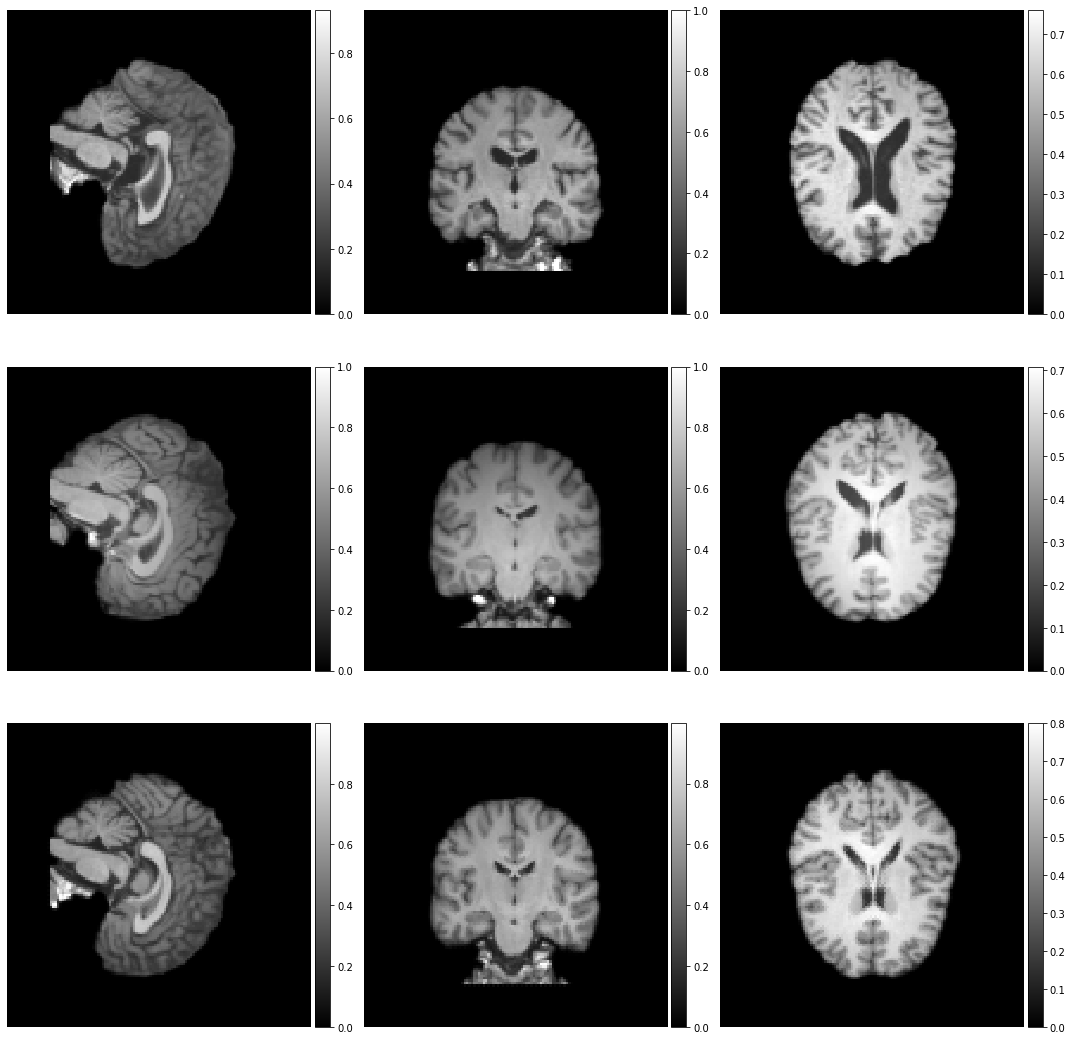

In [ ]:
mid_slices_fixed = [np.take(fixed_np, 63, axis=d) for d in range(3)]
mid_slices_fixed[1] = np.rot90(mid_slices_fixed[1], 1)
mid_slices_fixed[2] = np.rot90(mid_slices_fixed[2], -1)

mid_slices_moving = [np.take(moving_np, 63, axis=d) for d in range(3)]
mid_slices_moving[1] = np.rot90(mid_slices_moving[1], 1)
mid_slices_moving[2] = np.rot90(mid_slices_moving[2], -1)

mid_slices_pred = [np.take(warped_img_np, 63, axis=d) for d in range(3)]
mid_slices_pred[1] = np.rot90(mid_slices_pred[1], 1)
mid_slices_pred[2] = np.rot90(mid_slices_pred[2], -1)
ne.plot.slices(mid_slices_fixed + mid_slices_moving + mid_slices_pred, cmaps=['gray'], do_colorbars=True, grid=[3,3]);

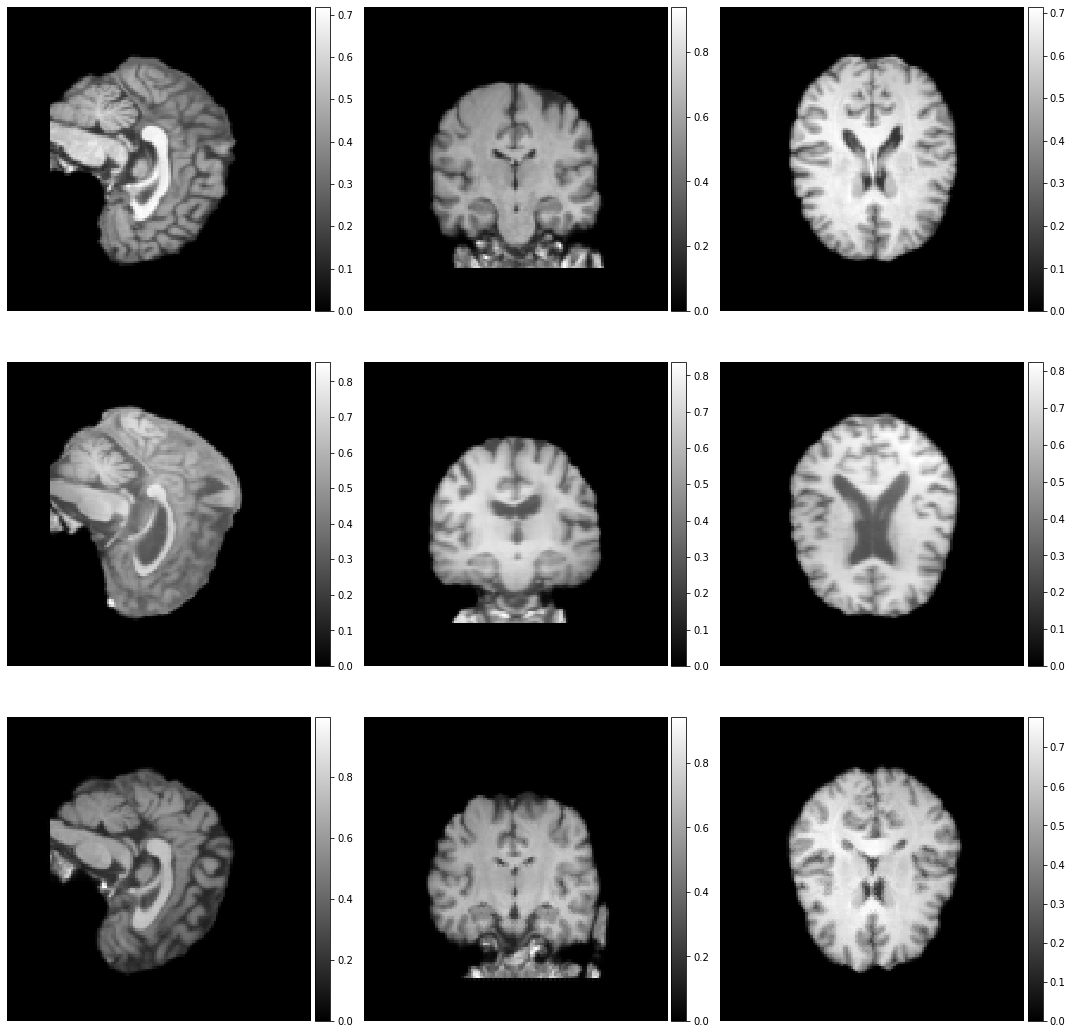

In [ ]:
mid_slices_fixed = [np.take(fixed_np, 63, axis=d) for d in range(3)]
mid_slices_fixed[1] = np.rot90(mid_slices_fixed[1], 1)
mid_slices_fixed[2] = np.rot90(mid_slices_fixed[2], -1)

mid_slices_moving = [np.take(moving_np, 63, axis=d) for d in range(3)]
mid_slices_moving[1] = np.rot90(mid_slices_moving[1], 1)
mid_slices_moving[2] = np.rot90(mid_slices_moving[2], -1)

mid_slices_pred = [np.take(warped_img_np, 63, axis=d) for d in range(3)]
mid_slices_pred[1] = np.rot90(mid_slices_pred[1], 1)
mid_slices_pred[2] = np.rot90(mid_slices_pred[2], -1)
ne.plot.slices(mid_slices_fixed + mid_slices_moving + mid_slices_pred, cmaps=['gray'], do_colorbars=True, grid=[3,3]);

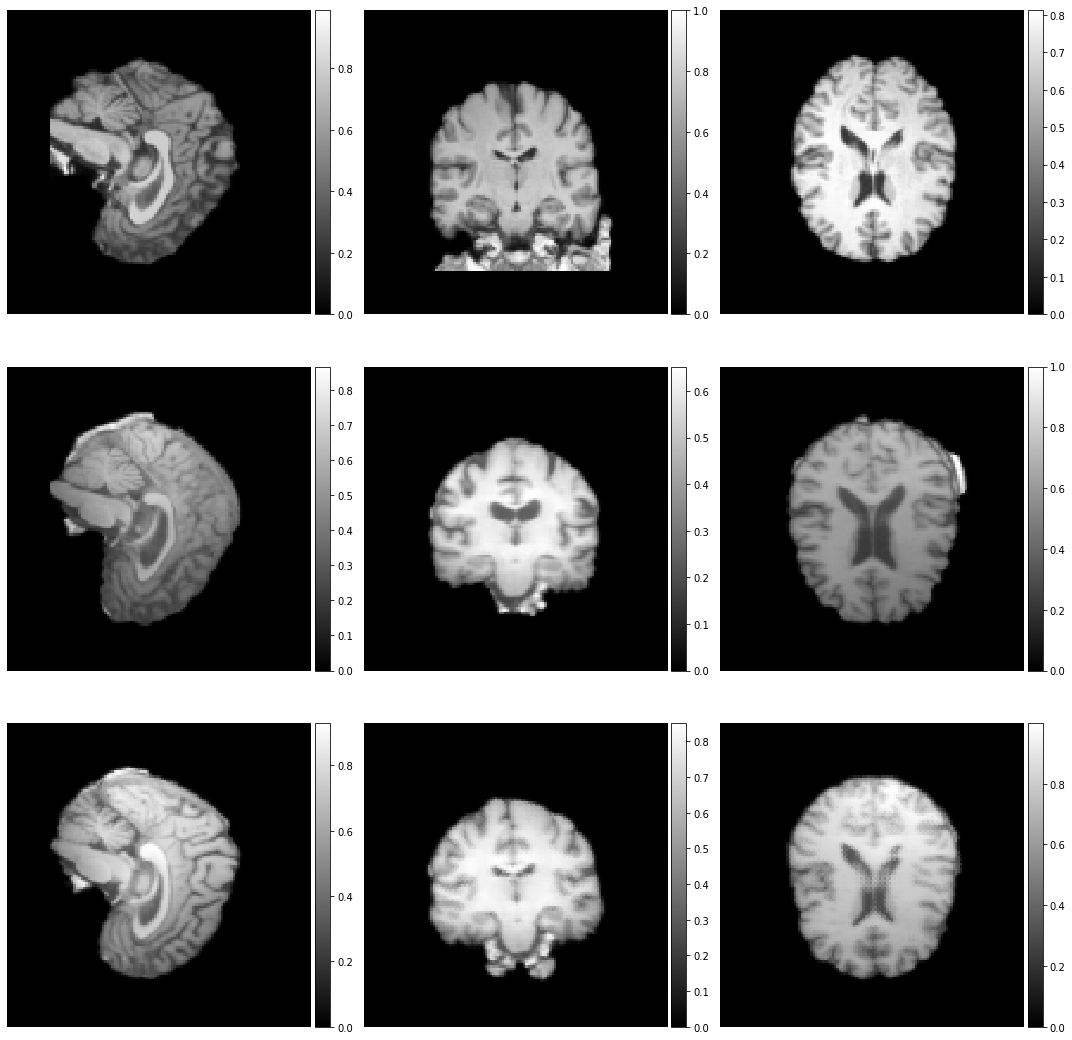

In [ ]:
mid_slices_fixed = [np.take(fixed_np, 63, axis=d) for d in range(3)]
mid_slices_fixed[1] = np.rot90(mid_slices_fixed[1], 1)
mid_slices_fixed[2] = np.rot90(mid_slices_fixed[2], -1)

mid_slices_moving = [np.take(moving_np, 63, axis=d) for d in range(3)]
mid_slices_moving[1] = np.rot90(mid_slices_moving[1], 1)
mid_slices_moving[2] = np.rot90(mid_slices_moving[2], -1)

mid_slices_pred = [np.take(warped_img_np, 63, axis=d) for d in range(3)]
mid_slices_pred[1] = np.rot90(mid_slices_pred[1], 1)
mid_slices_pred[2] = np.rot90(mid_slices_pred[2], -1)
ne.plot.slices(mid_slices_fixed + mid_slices_moving + mid_slices_pred, cmaps=['gray'], do_colorbars=True, grid=[3,3]);

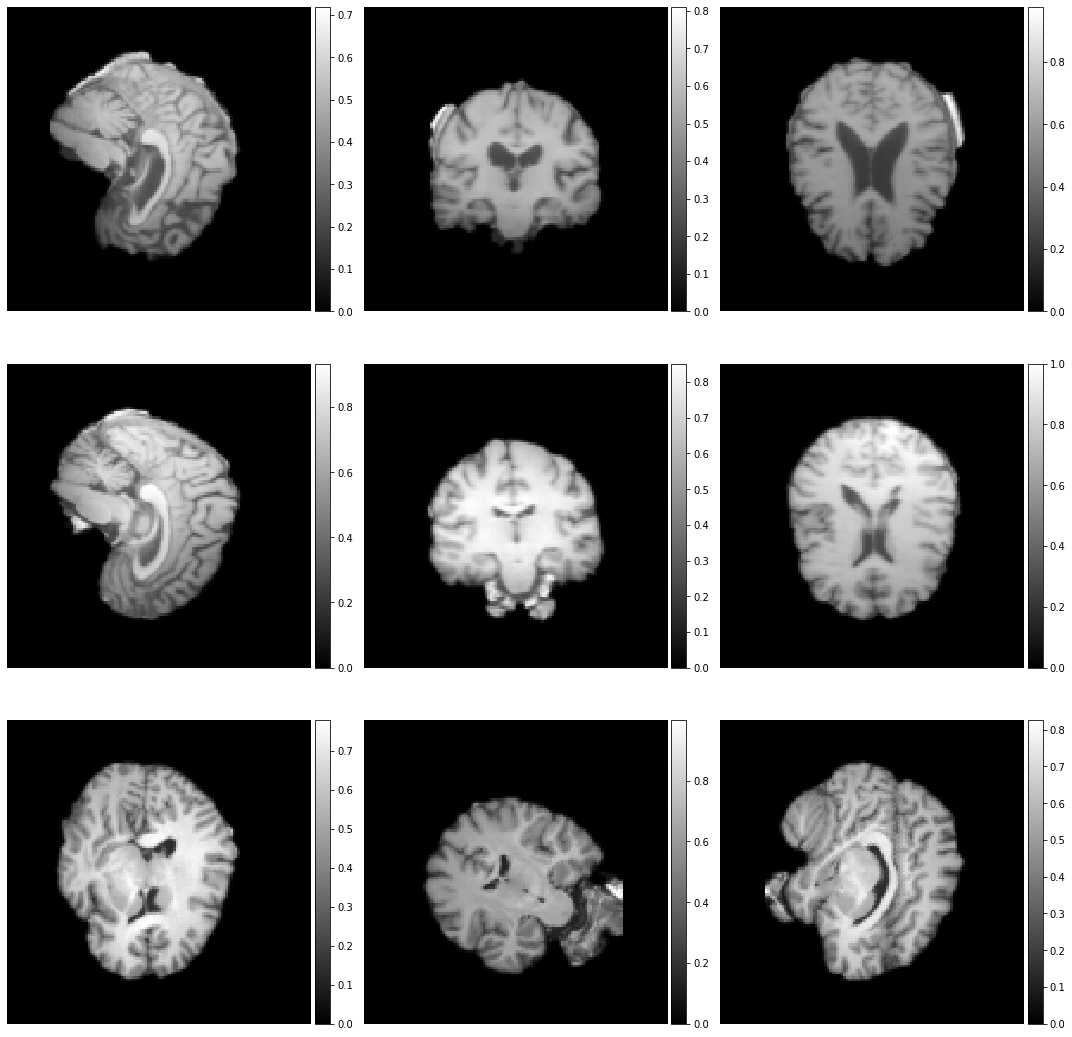

In [ ]:
mid_slices_fixed = [np.take(fixed_np, 63, axis=d) for d in range(3)]
mid_slices_fixed[1] = np.rot90(mid_slices_fixed[1], 1)
mid_slices_fixed[2] = np.rot90(mid_slices_fixed[2], -1)

mid_slices_moving = [np.take(moving_np, 63, axis=d) for d in range(3)]
mid_slices_moving[1] = np.rot90(mid_slices_moving[1], 1)
mid_slices_moving[2] = np.rot90(mid_slices_moving[2], -1)

mid_slices_pred = [np.take(warped_img_np, 63, axis=d) for d in range(3)]
mid_slices_pred[1] = np.rot90(mid_slices_pred[1], 1)
mid_slices_pred[2] = np.rot90(mid_slices_pred[2], -1)
ne.plot.slices(mid_slices_fixed + mid_slices_moving + mid_slices_pred, cmaps=['gray'], do_colorbars=True, grid=[3,3]);